In [32]:
import pandas as pd
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)
import numpy as np
import matplotlib.pyplot as plt  # 그래프 그리는 라이브러리
from sklearn.model_selection import train_test_split
from sklearn import metrics  # 평가를 위한 라이브러리
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import seaborn as sns  # 시각화 라이브러리

In [33]:
nc = pd.read_csv('data/NC다이노스.csv')
ds = pd.read_csv('data/두산베어스.csv')
kt = pd.read_csv('data/KT위즈.csv')
lg = pd.read_csv('data/LG트윈스.csv')
kia = pd.read_csv('data/KIA타이거즈.csv')
lotte = pd.read_csv('data/롯데자이언츠.csv')
samsung = pd.read_csv('data/삼성라이온즈.csv')
sk = pd.read_csv('data/SK와이번스.csv')
한화 = pd.read_csv('data/한화이글스.csv')
키움 = pd.read_csv('data/키움히어로즈.csv')


In [3]:
# 기온
bins = [5,11,16,21,26,31,36,41]  # 구간 만들기
labels = ['5~10', '10~15', '15~20', '20~25', '25~30', '30~35', '35~40']
nc['temp'] = pd.cut(nc['temp'], bins = bins, labels = labels)
ds['temp'] = pd.cut(ds['temp'], bins = bins, labels = labels)
kt['temp'] = pd.cut(kt['temp'], bins = bins, labels = labels)
lg['temp'] = pd.cut(lg['temp'], bins = bins, labels = labels)
kia['temp'] = pd.cut(kia['temp'], bins = bins, labels = labels)
lotte['temp'] = pd.cut(lotte['temp'], bins = bins, labels = labels)
samsung['temp'] = pd.cut(samsung['temp'], bins = bins, labels = labels)
sk['temp'] = pd.cut(sk['temp'], bins = bins, labels = labels)
한화['temp'] = pd.cut(한화['temp'], bins = bins, labels = labels)
키움['temp'] = pd.cut(키움['temp'], bins = bins, labels = labels)

In [34]:
# 홈런 갯수 구간 나누기
# bins = [0,2,4,6,8,10]  # 구간 만들기
# labels = ['0~1','2~3','4~5','6~7', '8~9']


bins = [1,2,3,4,5,6,7,8,9]
labels = ['1', '2', '3', '4','5', '6', '7','8' ]
nc['HR_text'] = pd.cut(nc['HR_text'], bins = bins, labels = labels)
ds['HR_text'] = pd.cut(ds['HR_text'], bins = bins, labels = labels)
kt['HR_text'] = pd.cut(kt['HR_text'], bins = bins, labels = labels)
lg['HR_text'] = pd.cut(lg['HR_text'], bins = bins, labels = labels)
kia['HR_text'] = pd.cut(kia['HR_text'], bins = bins, labels = labels)
lotte['HR_text'] = pd.cut(lotte['HR_text'], bins = bins, labels = labels)
samsung['HR_text'] = pd.cut(samsung['HR_text'], bins = bins, labels = labels)
sk['HR_text'] = pd.cut(sk['HR_text'], bins = bins, labels = labels)
한화['HR_text'] = pd.cut(한화['HR_text'], bins = bins, labels = labels)
키움['HR_text'] = pd.cut(키움['HR_text'], bins = bins, labels = labels)

In [5]:
# 습도 구간 나누기
bins = [-1,21,41,61,81,101]  # 구간 만들기
labels = ['0~20','21~40','41~60','61~80', '81~100']
nc['humidity'] = pd.cut(nc['humidity'], bins = bins, labels = labels)
ds['humidity'] = pd.cut(ds['humidity'], bins = bins, labels = labels)
kt['humidity'] = pd.cut(kt['humidity'], bins = bins, labels = labels)
lg['humidity'] = pd.cut(lg['humidity'], bins = bins, labels = labels)
kia['humidity'] = pd.cut(kia['humidity'], bins = bins, labels = labels)
lotte['humidity'] = pd.cut(lotte['humidity'], bins = bins, labels = labels)
samsung['humidity'] = pd.cut(samsung['humidity'], bins = bins, labels = labels)
sk['humidity'] = pd.cut(sk['humidity'], bins = bins, labels = labels)
한화['humidity'] = pd.cut(한화['humidity'], bins = bins, labels = labels)
키움['humidity'] = pd.cut(키움['humidity'], bins = bins, labels = labels)

In [6]:
# nc
test_result = nc[['HR_text', 'team_text','humidity', 'day_text']].groupby(['HR_text','humidity', 'team_text']).count()
test_result

day_text
HR_text humidity team_text          
1       0~20     NC 다이노스         9.0
        21~40    NC 다이노스        31.0
        41~60    NC 다이노스        38.0
        61~80    NC 다이노스        65.0
        81~100   NC 다이노스        22.0
2       0~20     NC 다이노스         6.0
        21~40    NC 다이노스         7.0
        41~60    NC 다이노스        20.0
        61~80    NC 다이노스        28.0
        81~100   NC 다이노스        10.0
3       0~20     NC 다이노스         1.0
        21~40    NC 다이노스         2.0
        41~60    NC 다이노스         6.0
        61~80    NC 다이노스         3.0
        81~100   NC 다이노스         4.0
4       0~20     NC 다이노스         NaN
        21~40    NC 다이노스         2.0
        41~60    NC 다이노스         2.0
        61~80    NC 다이노스         4.0
        81~100   NC 다이노스         NaN
5       0~20     NC 다이노스         NaN
        21~40    NC 다이노스         1.0
        41~60    NC 다이노스         NaN
        61~80    NC 다이노스         NaN
        81~100   NC 다이노스         1.0
6       0~20     NC 다이노스         NaN
        21~40    NC 다이노스         NaN
        41~60    NC 다이노스         1.0
        61~80    NC 다이노스         NaN
        81~100   NC 다이노스         NaN
7       0~20     NC 다이노스         NaN
        21~40    NC 다이노스         NaN
        41~60    NC 다이노스         NaN
        61~80    NC 다이노스         NaN
        81~100   NC 다이노스         NaN
8       0~20     NC 다이노스         NaN
        21~40    NC 다이노스         NaN
        41~60    NC 다이노스         NaN
        61~80    NC 다이노스         NaN
        81~100   NC 다이노스         NaN

<AxesSubplot:xlabel='humidity', ylabel='count'>

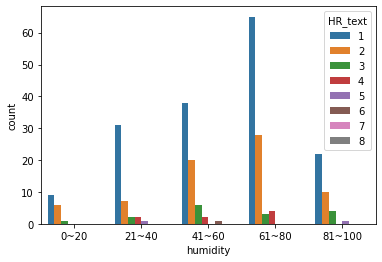

In [7]:
sns.countplot(data = nc, x = 'humidity', hue='HR_text')

In [8]:
test_result = nc[['humidity', 'HR_text', 'result_text', 'day_text']].groupby(['humidity', 'HR_text','result_text']).count()
test_result

day_text
humidity HR_text result_text          
0~20     1       0                 3.0
                 1                 6.0
         2       0                 1.0
                 1                 5.0
         3       0                 NaN
                 1                 1.0
         4       0                 NaN
                 1                 NaN
         5       0                 NaN
                 1                 NaN
         6       0                 NaN
                 1                 NaN
         7       0                 NaN
                 1                 NaN
         8       0                 NaN
                 1                 NaN
21~40    1       0                10.0
                 1                21.0
         2       0                 3.0
                 1                 4.0
         3       0                 NaN
                 1                 2.0
         4       0                 NaN
                 1                 2.0
         5       0                 NaN
                 1                 1.0
         6       0                 NaN
                 1                 NaN
         7       0                 NaN
                 1                 NaN
         8       0                 NaN
                 1                 NaN
41~60    1       0                 9.0
                 1                29.0
         2       0                 6.0
                 1                14.0
         3       0                 2.0
                 1                 4.0
         4       0                 NaN
                 1                 2.0
         5       0                 NaN
                 1                 NaN
         6       0                 NaN
                 1                 1.0
         7       0                 NaN
                 1                 NaN
         8       0                 NaN
                 1                 NaN
61~80    1       0                15.0
                 1                50.0
         2       0                10.0
                 1                18.0
         3       0                 NaN
                 1                 3.0
         4       0                 NaN
                 1                 4.0
         5       0                 NaN
                 1                 NaN
         6       0                 NaN
                 1                 NaN
         7       0                 NaN
                 1                 NaN
         8       0                 NaN
                 1                 NaN
81~100   1       0                10.0
                 1                12.0
         2       0                 1.0
                 1                 9.0
         3       0                 NaN
                 1                 4.0
         4       0                 NaN
                 1                 NaN
         5       0                 NaN
                 1                 1.0
         6       0                 NaN
                 1                 NaN
         7       0                 NaN
                 1                 NaN
         8       0                 NaN
                 1                 NaN

In [6]:
# 두산
test_result = ds[['HR_text', 'team_text','humidity', 'day_text']].groupby(['HR_text','humidity', 'team_text']).count()
test_result

day_text
HR_text humidity team_text          
1       0~20     두산 베어스         10.0
        21~40    두산 베어스         36.0
        41~60    두산 베어스         51.0
        61~80    두산 베어스         37.0
        81~100   두산 베어스         20.0
2       0~20     두산 베어스          8.0
        21~40    두산 베어스         10.0
        41~60    두산 베어스         15.0
        61~80    두산 베어스         22.0
        81~100   두산 베어스          7.0
3       0~20     두산 베어스          1.0
        21~40    두산 베어스          4.0
        41~60    두산 베어스         12.0
        61~80    두산 베어스          5.0
        81~100   두산 베어스          2.0
4       0~20     두산 베어스          1.0
        21~40    두산 베어스          1.0
        41~60    두산 베어스          3.0
        61~80    두산 베어스          2.0
        81~100   두산 베어스          2.0
5       0~20     두산 베어스          NaN
        21~40    두산 베어스          1.0
        41~60    두산 베어스          2.0
        61~80    두산 베어스          1.0
        81~100   두산 베어스          NaN
6       0~20     두산 베어스          NaN
        21~40    두산 베어스          NaN
        41~60    두산 베어스          NaN
        61~80    두산 베어스          NaN
        81~100   두산 베어스          NaN
7       0~20     두산 베어스          NaN
        21~40    두산 베어스          NaN
        41~60    두산 베어스          NaN
        61~80    두산 베어스          NaN
        81~100   두산 베어스          NaN
8       0~20     두산 베어스          NaN
        21~40    두산 베어스          NaN
        41~60    두산 베어스          NaN
        61~80    두산 베어스          NaN
        81~100   두산 베어스          NaN

<AxesSubplot:xlabel='humidity', ylabel='count'>

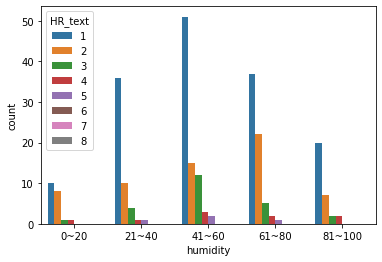

In [10]:
sns.countplot(data = ds, x = 'humidity', hue='HR_text')

In [11]:
test_result = kt[['HR_text', 'team_text','humidity', 'day_text']].groupby(['HR_text','humidity', 'team_text']).count()
test_result

day_text
HR_text humidity team_text          
1       0~20     kt wiz          4.0
        21~40    kt wiz         18.0
        41~60    kt wiz         46.0
        61~80    kt wiz         35.0
        81~100   kt wiz         11.0
2       0~20     kt wiz          2.0
        21~40    kt wiz          6.0
        41~60    kt wiz          6.0
        61~80    kt wiz          8.0
        81~100   kt wiz          6.0
3       0~20     kt wiz          NaN
        21~40    kt wiz          2.0
        41~60    kt wiz          3.0
        61~80    kt wiz          9.0
        81~100   kt wiz          1.0
4       0~20     kt wiz          NaN
        21~40    kt wiz          2.0
        41~60    kt wiz          1.0
        61~80    kt wiz          NaN
        81~100   kt wiz          1.0
5       0~20     kt wiz          NaN
        21~40    kt wiz          NaN
        41~60    kt wiz          NaN
        61~80    kt wiz          2.0
        81~100   kt wiz          NaN
6       0~20     kt wiz          NaN
        21~40    kt wiz          NaN
        41~60    kt wiz          NaN
        61~80    kt wiz          NaN
        81~100   kt wiz          NaN
7       0~20     kt wiz          NaN
        21~40    kt wiz          NaN
        41~60    kt wiz          NaN
        61~80    kt wiz          NaN
        81~100   kt wiz          NaN
8       0~20     kt wiz          NaN
        21~40    kt wiz          NaN
        41~60    kt wiz          NaN
        61~80    kt wiz          NaN
        81~100   kt wiz          NaN

<AxesSubplot:xlabel='humidity', ylabel='count'>

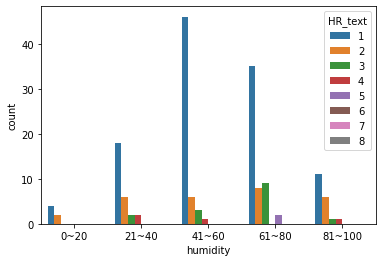

In [12]:
sns.countplot(data = kt, x = 'humidity', hue='HR_text')

In [13]:
test_result = lg[['HR_text', 'team_text','humidity', 'day_text']].groupby(['HR_text','humidity', 'team_text']).count()
test_result

day_text
HR_text humidity team_text          
1       0~20     LG 트윈스          9.0
        21~40    LG 트윈스         27.0
        41~60    LG 트윈스         47.0
        61~80    LG 트윈스         38.0
        81~100   LG 트윈스         11.0
2       0~20     LG 트윈스          3.0
        21~40    LG 트윈스          7.0
        41~60    LG 트윈스         15.0
        61~80    LG 트윈스         15.0
        81~100   LG 트윈스          1.0
3       0~20     LG 트윈스          1.0
        21~40    LG 트윈스          2.0
        41~60    LG 트윈스          2.0
        61~80    LG 트윈스          5.0
        81~100   LG 트윈스          1.0
4       0~20     LG 트윈스          NaN
        21~40    LG 트윈스          1.0
        41~60    LG 트윈스          NaN
        61~80    LG 트윈스          1.0
        81~100   LG 트윈스          NaN
5       0~20     LG 트윈스          NaN
        21~40    LG 트윈스          NaN
        41~60    LG 트윈스          NaN
        61~80    LG 트윈스          1.0
        81~100   LG 트윈스          NaN
6       0~20     LG 트윈스          NaN
        21~40    LG 트윈스          NaN
        41~60    LG 트윈스          NaN
        61~80    LG 트윈스          NaN
        81~100   LG 트윈스          NaN
7       0~20     LG 트윈스          NaN
        21~40    LG 트윈스          NaN
        41~60    LG 트윈스          NaN
        61~80    LG 트윈스          NaN
        81~100   LG 트윈스          NaN
8       0~20     LG 트윈스          NaN
        21~40    LG 트윈스          NaN
        41~60    LG 트윈스          NaN
        61~80    LG 트윈스          NaN
        81~100   LG 트윈스          NaN

<AxesSubplot:xlabel='humidity', ylabel='count'>

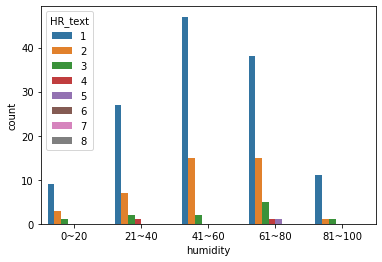

In [14]:
sns.countplot(data = lg, x = 'humidity', hue='HR_text')

In [15]:
test_result = 키움[['HR_text', 'team_text','humidity', 'day_text']].groupby(['HR_text','humidity', 'team_text']).count()
test_result

day_text
HR_text humidity team_text          
1       0~20     키움 히어로즈        14.0
        21~40    키움 히어로즈        43.0
        41~60    키움 히어로즈        57.0
        61~80    키움 히어로즈        51.0
        81~100   키움 히어로즈        15.0
2       0~20     키움 히어로즈         3.0
        21~40    키움 히어로즈        19.0
        41~60    키움 히어로즈        30.0
        61~80    키움 히어로즈        24.0
        81~100   키움 히어로즈        11.0
3       0~20     키움 히어로즈         1.0
        21~40    키움 히어로즈         4.0
        41~60    키움 히어로즈        12.0
        61~80    키움 히어로즈        11.0
        81~100   키움 히어로즈         1.0
4       0~20     키움 히어로즈         1.0
        21~40    키움 히어로즈         2.0
        41~60    키움 히어로즈         1.0
        61~80    키움 히어로즈         4.0
        81~100   키움 히어로즈         1.0
5       0~20     키움 히어로즈         NaN
        21~40    키움 히어로즈         NaN
        41~60    키움 히어로즈         NaN
        61~80    키움 히어로즈         NaN
        81~100   키움 히어로즈         1.0
6       0~20     키움 히어로즈         NaN
        21~40    키움 히어로즈         NaN
        41~60    키움 히어로즈         1.0
        61~80    키움 히어로즈         NaN
        81~100   키움 히어로즈         NaN
7       0~20     키움 히어로즈         NaN
        21~40    키움 히어로즈         NaN
        41~60    키움 히어로즈         NaN
        61~80    키움 히어로즈         NaN
        81~100   키움 히어로즈         NaN
8       0~20     키움 히어로즈         NaN
        21~40    키움 히어로즈         NaN
        41~60    키움 히어로즈         NaN
        61~80    키움 히어로즈         NaN
        81~100   키움 히어로즈         NaN

<AxesSubplot:xlabel='humidity', ylabel='count'>

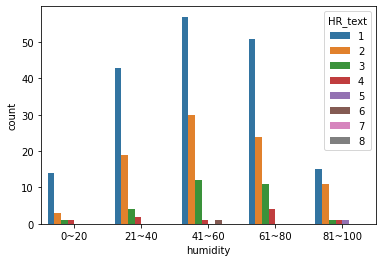

In [16]:
sns.countplot(data = 키움, x = 'humidity', hue='HR_text')

In [17]:
test_result = kia[['HR_text', 'team_text','humidity', 'day_text']].groupby(['HR_text','humidity', 'team_text']).count()
test_result

day_text
HR_text humidity team_text          
1       0~20     KIA 타이거즈       10.0
        21~40    KIA 타이거즈       34.0
        41~60    KIA 타이거즈       58.0
        61~80    KIA 타이거즈       45.0
        81~100   KIA 타이거즈       20.0
2       0~20     KIA 타이거즈        4.0
        21~40    KIA 타이거즈        4.0
        41~60    KIA 타이거즈       20.0
        61~80    KIA 타이거즈       19.0
        81~100   KIA 타이거즈        4.0
3       0~20     KIA 타이거즈        2.0
        21~40    KIA 타이거즈        1.0
        41~60    KIA 타이거즈        7.0
        61~80    KIA 타이거즈        4.0
        81~100   KIA 타이거즈        2.0
4       0~20     KIA 타이거즈        NaN
        21~40    KIA 타이거즈        2.0
        41~60    KIA 타이거즈        1.0
        61~80    KIA 타이거즈        1.0
        81~100   KIA 타이거즈        NaN
5       0~20     KIA 타이거즈        NaN
        21~40    KIA 타이거즈        NaN
        41~60    KIA 타이거즈        NaN
        61~80    KIA 타이거즈        1.0
        81~100   KIA 타이거즈        NaN
6       0~20     KIA 타이거즈        NaN
        21~40    KIA 타이거즈        NaN
        41~60    KIA 타이거즈        NaN
        61~80    KIA 타이거즈        NaN
        81~100   KIA 타이거즈        NaN
7       0~20     KIA 타이거즈        NaN
        21~40    KIA 타이거즈        NaN
        41~60    KIA 타이거즈        NaN
        61~80    KIA 타이거즈        1.0
        81~100   KIA 타이거즈        NaN
8       0~20     KIA 타이거즈        NaN
        21~40    KIA 타이거즈        NaN
        41~60    KIA 타이거즈        NaN
        61~80    KIA 타이거즈        NaN
        81~100   KIA 타이거즈        NaN

<AxesSubplot:xlabel='humidity', ylabel='count'>

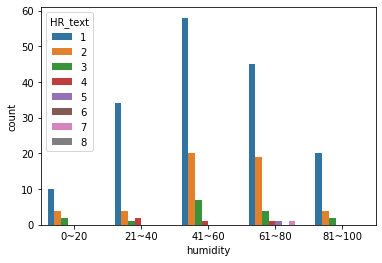

In [18]:
sns.countplot(data = kia, x = 'humidity', hue='HR_text')

In [19]:
test_result = lotte[['HR_text', 'team_text','humidity', 'day_text']].groupby(['HR_text','humidity', 'team_text']).count()
test_result

day_text
HR_text humidity team_text          
1       0~20     롯데 자이언츠         8.0
        21~40    롯데 자이언츠        19.0
        41~60    롯데 자이언츠        43.0
        61~80    롯데 자이언츠        69.0
        81~100   롯데 자이언츠        20.0
2       0~20     롯데 자이언츠         NaN
        21~40    롯데 자이언츠         4.0
        41~60    롯데 자이언츠        23.0
        61~80    롯데 자이언츠        26.0
        81~100   롯데 자이언츠         6.0
3       0~20     롯데 자이언츠         NaN
        21~40    롯데 자이언츠         4.0
        41~60    롯데 자이언츠         9.0
        61~80    롯데 자이언츠         1.0
        81~100   롯데 자이언츠         6.0
4       0~20     롯데 자이언츠         NaN
        21~40    롯데 자이언츠         1.0
        41~60    롯데 자이언츠         2.0
        61~80    롯데 자이언츠         3.0
        81~100   롯데 자이언츠         NaN
5       0~20     롯데 자이언츠         NaN
        21~40    롯데 자이언츠         NaN
        41~60    롯데 자이언츠         NaN
        61~80    롯데 자이언츠         NaN
        81~100   롯데 자이언츠         NaN
6       0~20     롯데 자이언츠         NaN
        21~40    롯데 자이언츠         NaN
        41~60    롯데 자이언츠         1.0
        61~80    롯데 자이언츠         1.0
        81~100   롯데 자이언츠         NaN
7       0~20     롯데 자이언츠         NaN
        21~40    롯데 자이언츠         NaN
        41~60    롯데 자이언츠         NaN
        61~80    롯데 자이언츠         NaN
        81~100   롯데 자이언츠         NaN
8       0~20     롯데 자이언츠         NaN
        21~40    롯데 자이언츠         NaN
        41~60    롯데 자이언츠         NaN
        61~80    롯데 자이언츠         NaN
        81~100   롯데 자이언츠         NaN

<AxesSubplot:xlabel='humidity', ylabel='count'>

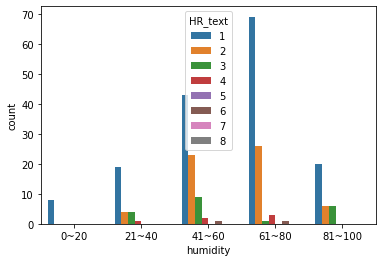

In [20]:
sns.countplot(data = lotte, x = 'humidity', hue='HR_text')

In [21]:
test_result = samsung[['HR_text', 'team_text','humidity', 'day_text']].groupby(['HR_text','humidity', 'team_text']).count()
test_result

day_text
HR_text humidity team_text          
1       0~20     삼성 라이온즈        17.0
        21~40    삼성 라이온즈        36.0
        41~60    삼성 라이온즈        65.0
        61~80    삼성 라이온즈        33.0
        81~100   삼성 라이온즈        16.0
2       0~20     삼성 라이온즈        10.0
        21~40    삼성 라이온즈        24.0
        41~60    삼성 라이온즈        24.0
        61~80    삼성 라이온즈        12.0
        81~100   삼성 라이온즈        11.0
3       0~20     삼성 라이온즈         NaN
        21~40    삼성 라이온즈         3.0
        41~60    삼성 라이온즈         8.0
        61~80    삼성 라이온즈         8.0
        81~100   삼성 라이온즈         1.0
4       0~20     삼성 라이온즈         NaN
        21~40    삼성 라이온즈         1.0
        41~60    삼성 라이온즈         3.0
        61~80    삼성 라이온즈         2.0
        81~100   삼성 라이온즈         NaN
5       0~20     삼성 라이온즈         NaN
        21~40    삼성 라이온즈         NaN
        41~60    삼성 라이온즈         1.0
        61~80    삼성 라이온즈         NaN
        81~100   삼성 라이온즈         NaN
6       0~20     삼성 라이온즈         NaN
        21~40    삼성 라이온즈         NaN
        41~60    삼성 라이온즈         NaN
        61~80    삼성 라이온즈         NaN
        81~100   삼성 라이온즈         NaN
7       0~20     삼성 라이온즈         NaN
        21~40    삼성 라이온즈         NaN
        41~60    삼성 라이온즈         NaN
        61~80    삼성 라이온즈         NaN
        81~100   삼성 라이온즈         NaN
8       0~20     삼성 라이온즈         NaN
        21~40    삼성 라이온즈         NaN
        41~60    삼성 라이온즈         NaN
        61~80    삼성 라이온즈         NaN
        81~100   삼성 라이온즈         NaN

<AxesSubplot:xlabel='humidity', ylabel='count'>

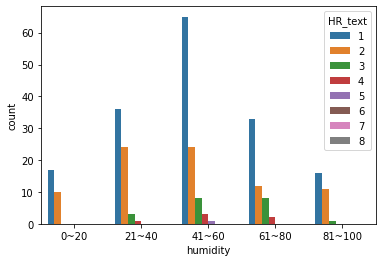

In [22]:
sns.countplot(data = samsung, x = 'humidity', hue='HR_text')

In [23]:
test_result = sk[['HR_text', 'team_text','humidity', 'day_text']].groupby(['HR_text','humidity', 'team_text']).count()
test_result

day_text
HR_text humidity team_text          
1       0~20     SK 와이번스         8.0
        21~40    SK 와이번스        29.0
        41~60    SK 와이번스        66.0
        61~80    SK 와이번스        71.0
        81~100   SK 와이번스        35.0
2       0~20     SK 와이번스         3.0
        21~40    SK 와이번스         4.0
        41~60    SK 와이번스        27.0
        61~80    SK 와이번스        43.0
        81~100   SK 와이번스        21.0
3       0~20     SK 와이번스         2.0
        21~40    SK 와이번스         4.0
        41~60    SK 와이번스         9.0
        61~80    SK 와이번스         5.0
        81~100   SK 와이번스         6.0
4       0~20     SK 와이번스         NaN
        21~40    SK 와이번스         4.0
        41~60    SK 와이번스         1.0
        61~80    SK 와이번스         2.0
        81~100   SK 와이번스         NaN
5       0~20     SK 와이번스         NaN
        21~40    SK 와이번스         4.0
        41~60    SK 와이번스         NaN
        61~80    SK 와이번스         1.0
        81~100   SK 와이번스         1.0
6       0~20     SK 와이번스         NaN
        21~40    SK 와이번스         NaN
        41~60    SK 와이번스         1.0
        61~80    SK 와이번스         NaN
        81~100   SK 와이번스         NaN
7       0~20     SK 와이번스         NaN
        21~40    SK 와이번스         NaN
        41~60    SK 와이번스         NaN
        61~80    SK 와이번스         NaN
        81~100   SK 와이번스         NaN
8       0~20     SK 와이번스         NaN
        21~40    SK 와이번스         NaN
        41~60    SK 와이번스         NaN
        61~80    SK 와이번스         NaN
        81~100   SK 와이번스         NaN

<AxesSubplot:xlabel='humidity', ylabel='count'>

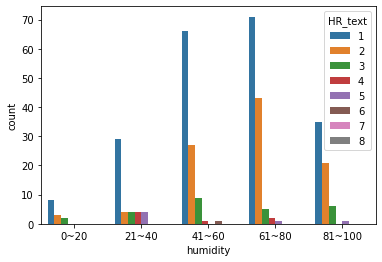

In [24]:
sns.countplot(data = sk, x = 'humidity', hue='HR_text')

In [25]:
test_result = 한화[['HR_text', 'team_text','humidity', 'day_text']].groupby(['HR_text','humidity', 'team_text']).count()
test_result

day_text
HR_text humidity team_text          
1       0~20     한화 이글스          6.0
        21~40    한화 이글스         24.0
        41~60    한화 이글스         54.0
        61~80    한화 이글스         46.0
        81~100   한화 이글스         18.0
2       0~20     한화 이글스          NaN
        21~40    한화 이글스          8.0
        41~60    한화 이글스         17.0
        61~80    한화 이글스         16.0
        81~100   한화 이글스          4.0
3       0~20     한화 이글스          1.0
        21~40    한화 이글스          3.0
        41~60    한화 이글스          2.0
        61~80    한화 이글스          4.0
        81~100   한화 이글스          1.0
4       0~20     한화 이글스          NaN
        21~40    한화 이글스          1.0
        41~60    한화 이글스          2.0
        61~80    한화 이글스          1.0
        81~100   한화 이글스          1.0
5       0~20     한화 이글스          NaN
        21~40    한화 이글스          NaN
        41~60    한화 이글스          1.0
        61~80    한화 이글스          NaN
        81~100   한화 이글스          NaN
6       0~20     한화 이글스          NaN
        21~40    한화 이글스          NaN
        41~60    한화 이글스          NaN
        61~80    한화 이글스          NaN
        81~100   한화 이글스          NaN
7       0~20     한화 이글스          NaN
        21~40    한화 이글스          NaN
        41~60    한화 이글스          NaN
        61~80    한화 이글스          NaN
        81~100   한화 이글스          NaN
8       0~20     한화 이글스          NaN
        21~40    한화 이글스          NaN
        41~60    한화 이글스          NaN
        61~80    한화 이글스          NaN
        81~100   한화 이글스          NaN

<AxesSubplot:xlabel='humidity', ylabel='count'>

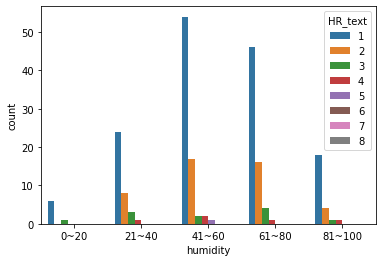

In [26]:
sns.countplot(data = 한화, x = 'humidity', hue='HR_text')

In [35]:
# 기온 10도씩 나눠서 /  5부터 10씩
# bins = [5,11,16,21,26,31,36,41]  # 구간 만들기
# labels = ['5~10', '10~15', '15~20', '20~25', '25~30', '30~35', '35~40']

bins = [5,15, 25, 35, 45]
labels = ['5~15', '16~24', '25~34', '35~45']


nc['temp'] = pd.cut(nc['temp'], bins = bins, labels = labels)
ds['temp'] = pd.cut(ds['temp'], bins = bins, labels = labels)
kt['temp'] = pd.cut(kt['temp'], bins = bins, labels = labels)
lg['temp'] = pd.cut(lg['temp'], bins = bins, labels = labels)
kia['temp'] = pd.cut(kia['temp'], bins = bins, labels = labels)
lotte['temp'] = pd.cut(lotte['temp'], bins = bins, labels = labels)
samsung['temp'] = pd.cut(samsung['temp'], bins = bins, labels = labels)
sk['temp'] = pd.cut(sk['temp'], bins = bins, labels = labels)
한화['temp'] = pd.cut(한화['temp'], bins = bins, labels = labels)
키움['temp'] = pd.cut(키움['temp'], bins = bins, labels = labels)

In [36]:
test_result = nc[['HR_text', 'team_text','temp', 'day_text']].groupby(['HR_text','temp', 'team_text']).count()
test_result

day_text
HR_text temp  team_text          
1       5~15  NC 다이노스        11.0
        16~24 NC 다이노스        77.0
        25~34 NC 다이노스        76.0
        35~45 NC 다이노스         1.0
2       5~15  NC 다이노스         6.0
        16~24 NC 다이노스        39.0
        25~34 NC 다이노스        25.0
        35~45 NC 다이노스         1.0
3       5~15  NC 다이노스         1.0
        16~24 NC 다이노스         7.0
        25~34 NC 다이노스         8.0
        35~45 NC 다이노스         NaN
4       5~15  NC 다이노스         NaN
        16~24 NC 다이노스         3.0
        25~34 NC 다이노스         5.0
        35~45 NC 다이노스         NaN
5       5~15  NC 다이노스         1.0
        16~24 NC 다이노스         1.0
        25~34 NC 다이노스         NaN
        35~45 NC 다이노스         NaN
6       5~15  NC 다이노스         NaN
        16~24 NC 다이노스         1.0
        25~34 NC 다이노스         NaN
        35~45 NC 다이노스         NaN
7       5~15  NC 다이노스         NaN
        16~24 NC 다이노스         NaN
        25~34 NC 다이노스         NaN
        35~45 NC 다이노스         NaN
8       5~15  NC 다이노스         NaN
        16~24 NC 다이노스         NaN
        25~34 NC 다이노스         NaN
        35~45 NC 다이노스         NaN

<AxesSubplot:xlabel='temp', ylabel='count'>

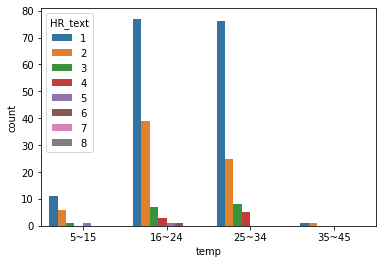

In [13]:
sns.countplot(data = nc, x = 'temp', hue='HR_text')

In [14]:
test_result = ds[['HR_text', 'team_text','temp', 'day_text']].groupby(['HR_text','temp', 'team_text']).count()
test_result

day_text
HR_text temp  team_text          
1       5~15  두산 베어스         11.0
        16~24 두산 베어스         78.0
        25~34 두산 베어스         64.0
        35~45 두산 베어스          1.0
2       5~15  두산 베어스          1.0
        16~24 두산 베어스         27.0
        25~34 두산 베어스         33.0
        35~45 두산 베어스          1.0
3       5~15  두산 베어스          2.0
        16~24 두산 베어스          9.0
        25~34 두산 베어스         13.0
        35~45 두산 베어스          NaN
4       5~15  두산 베어스          1.0
        16~24 두산 베어스          5.0
        25~34 두산 베어스          3.0
        35~45 두산 베어스          NaN
5       5~15  두산 베어스          NaN
        16~24 두산 베어스          4.0
        25~34 두산 베어스          NaN
        35~45 두산 베어스          NaN
6       5~15  두산 베어스          NaN
        16~24 두산 베어스          NaN
        25~34 두산 베어스          NaN
        35~45 두산 베어스          NaN
7       5~15  두산 베어스          NaN
        16~24 두산 베어스          NaN
        25~34 두산 베어스          NaN
        35~45 두산 베어스          NaN
8       5~15  두산 베어스          NaN
        16~24 두산 베어스          NaN
        25~34 두산 베어스          NaN
        35~45 두산 베어스          NaN

<AxesSubplot:xlabel='temp', ylabel='count'>

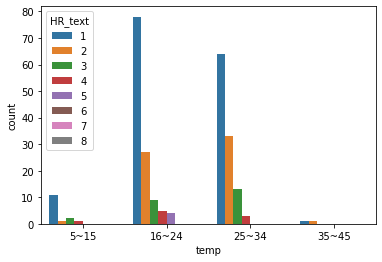

In [15]:
sns.countplot(data = ds, x = 'temp', hue='HR_text')

In [16]:
test_result = kt[['HR_text', 'team_text','temp', 'day_text']].groupby(['HR_text','temp', 'team_text']).count()
test_result

day_text
HR_text temp  team_text          
1       5~15  kt wiz          5.0
        16~24 kt wiz         58.0
        25~34 kt wiz         50.0
        35~45 kt wiz          1.0
2       5~15  kt wiz          1.0
        16~24 kt wiz         10.0
        25~34 kt wiz         17.0
        35~45 kt wiz          NaN
3       5~15  kt wiz          1.0
        16~24 kt wiz          8.0
        25~34 kt wiz          6.0
        35~45 kt wiz          NaN
4       5~15  kt wiz          NaN
        16~24 kt wiz          2.0
        25~34 kt wiz          2.0
        35~45 kt wiz          NaN
5       5~15  kt wiz          NaN
        16~24 kt wiz          NaN
        25~34 kt wiz          2.0
        35~45 kt wiz          NaN
6       5~15  kt wiz          NaN
        16~24 kt wiz          NaN
        25~34 kt wiz          NaN
        35~45 kt wiz          NaN
7       5~15  kt wiz          NaN
        16~24 kt wiz          NaN
        25~34 kt wiz          NaN
        35~45 kt wiz          NaN
8       5~15  kt wiz          NaN
        16~24 kt wiz          NaN
        25~34 kt wiz          NaN
        35~45 kt wiz          NaN

<AxesSubplot:xlabel='temp', ylabel='count'>

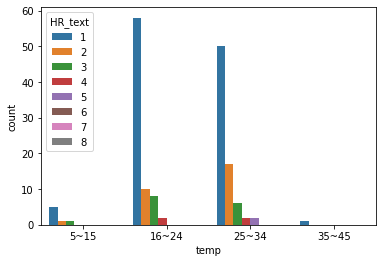

In [17]:
sns.countplot(data = kt, x = 'temp', hue='HR_text')

In [18]:
test_result = lg[['HR_text', 'team_text','temp', 'day_text']].groupby(['HR_text','temp', 'team_text']).count()
test_result

day_text
HR_text temp  team_text          
1       5~15  LG 트윈스         11.0
        16~24 LG 트윈스         53.0
        25~34 LG 트윈스         67.0
        35~45 LG 트윈스          1.0
2       5~15  LG 트윈스          1.0
        16~24 LG 트윈스         14.0
        25~34 LG 트윈스         24.0
        35~45 LG 트윈스          2.0
3       5~15  LG 트윈스          1.0
        16~24 LG 트윈스          4.0
        25~34 LG 트윈스          6.0
        35~45 LG 트윈스          NaN
4       5~15  LG 트윈스          1.0
        16~24 LG 트윈스          1.0
        25~34 LG 트윈스          NaN
        35~45 LG 트윈스          NaN
5       5~15  LG 트윈스          NaN
        16~24 LG 트윈스          NaN
        25~34 LG 트윈스          1.0
        35~45 LG 트윈스          NaN
6       5~15  LG 트윈스          NaN
        16~24 LG 트윈스          NaN
        25~34 LG 트윈스          NaN
        35~45 LG 트윈스          NaN
7       5~15  LG 트윈스          NaN
        16~24 LG 트윈스          NaN
        25~34 LG 트윈스          NaN
        35~45 LG 트윈스          NaN
8       5~15  LG 트윈스          NaN
        16~24 LG 트윈스          NaN
        25~34 LG 트윈스          NaN
        35~45 LG 트윈스          NaN

<AxesSubplot:xlabel='temp', ylabel='count'>

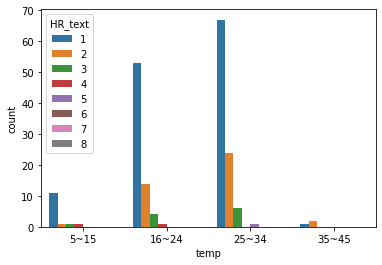

In [19]:
sns.countplot(data = lg, x = 'temp', hue='HR_text')

In [20]:
test_result = 키움[['HR_text', 'team_text','temp', 'day_text']].groupby(['HR_text','temp', 'team_text']).count()
test_result

day_text
HR_text temp  team_text          
1       5~15  키움 히어로즈         9.0
        16~24 키움 히어로즈        77.0
        25~34 키움 히어로즈        93.0
        35~45 키움 히어로즈         1.0
2       5~15  키움 히어로즈         5.0
        16~24 키움 히어로즈        37.0
        25~34 키움 히어로즈        45.0
        35~45 키움 히어로즈         NaN
3       5~15  키움 히어로즈         3.0
        16~24 키움 히어로즈         9.0
        25~34 키움 히어로즈        17.0
        35~45 키움 히어로즈         NaN
4       5~15  키움 히어로즈         1.0
        16~24 키움 히어로즈         3.0
        25~34 키움 히어로즈         5.0
        35~45 키움 히어로즈         NaN
5       5~15  키움 히어로즈         NaN
        16~24 키움 히어로즈         NaN
        25~34 키움 히어로즈         1.0
        35~45 키움 히어로즈         NaN
6       5~15  키움 히어로즈         NaN
        16~24 키움 히어로즈         NaN
        25~34 키움 히어로즈         1.0
        35~45 키움 히어로즈         NaN
7       5~15  키움 히어로즈         NaN
        16~24 키움 히어로즈         NaN
        25~34 키움 히어로즈         NaN
        35~45 키움 히어로즈         NaN
8       5~15  키움 히어로즈         NaN
        16~24 키움 히어로즈         NaN
        25~34 키움 히어로즈         NaN
        35~45 키움 히어로즈         NaN

<AxesSubplot:xlabel='temp', ylabel='count'>

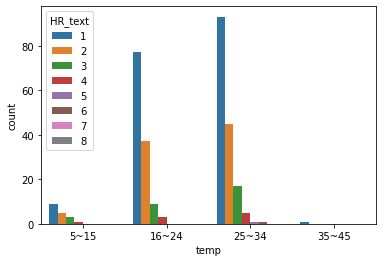

In [21]:
sns.countplot(data = 키움, x = 'temp', hue='HR_text')

In [22]:
test_result = kia[['HR_text', 'team_text','temp', 'day_text']].groupby(['HR_text','temp', 'team_text']).count()
test_result

day_text
HR_text temp  team_text          
1       5~15  KIA 타이거즈       12.0
        16~24 KIA 타이거즈       63.0
        25~34 KIA 타이거즈       92.0
        35~45 KIA 타이거즈        NaN
2       5~15  KIA 타이거즈        2.0
        16~24 KIA 타이거즈       20.0
        25~34 KIA 타이거즈       29.0
        35~45 KIA 타이거즈        NaN
3       5~15  KIA 타이거즈        1.0
        16~24 KIA 타이거즈        4.0
        25~34 KIA 타이거즈       11.0
        35~45 KIA 타이거즈        NaN
4       5~15  KIA 타이거즈        1.0
        16~24 KIA 타이거즈        1.0
        25~34 KIA 타이거즈        2.0
        35~45 KIA 타이거즈        NaN
5       5~15  KIA 타이거즈        NaN
        16~24 KIA 타이거즈        NaN
        25~34 KIA 타이거즈        1.0
        35~45 KIA 타이거즈        NaN
6       5~15  KIA 타이거즈        NaN
        16~24 KIA 타이거즈        NaN
        25~34 KIA 타이거즈        NaN
        35~45 KIA 타이거즈        NaN
7       5~15  KIA 타이거즈        NaN
        16~24 KIA 타이거즈        NaN
        25~34 KIA 타이거즈        1.0
        35~45 KIA 타이거즈        NaN
8       5~15  KIA 타이거즈        NaN
        16~24 KIA 타이거즈        NaN
        25~34 KIA 타이거즈        NaN
        35~45 KIA 타이거즈        NaN

<AxesSubplot:xlabel='temp', ylabel='count'>

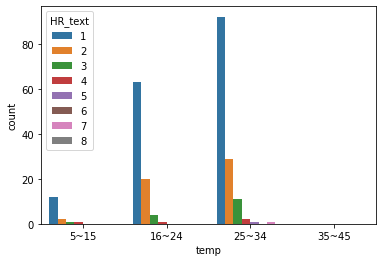

In [23]:
sns.countplot(data = kia, x = 'temp', hue='HR_text')

In [24]:
test_result = lotte[['HR_text', 'team_text','temp', 'day_text']].groupby(['HR_text','temp', 'team_text']).count()
test_result

day_text
HR_text temp  team_text          
1       5~15  롯데 자이언츠        12.0
        16~24 롯데 자이언츠        79.0
        25~34 롯데 자이언츠        68.0
        35~45 롯데 자이언츠         NaN
2       5~15  롯데 자이언츠         1.0
        16~24 롯데 자이언츠        39.0
        25~34 롯데 자이언츠        19.0
        35~45 롯데 자이언츠         NaN
3       5~15  롯데 자이언츠         2.0
        16~24 롯데 자이언츠        15.0
        25~34 롯데 자이언츠         3.0
        35~45 롯데 자이언츠         NaN
4       5~15  롯데 자이언츠         1.0
        16~24 롯데 자이언츠         2.0
        25~34 롯데 자이언츠         3.0
        35~45 롯데 자이언츠         NaN
5       5~15  롯데 자이언츠         NaN
        16~24 롯데 자이언츠         NaN
        25~34 롯데 자이언츠         NaN
        35~45 롯데 자이언츠         NaN
6       5~15  롯데 자이언츠         NaN
        16~24 롯데 자이언츠         2.0
        25~34 롯데 자이언츠         NaN
        35~45 롯데 자이언츠         NaN
7       5~15  롯데 자이언츠         NaN
        16~24 롯데 자이언츠         NaN
        25~34 롯데 자이언츠         NaN
        35~45 롯데 자이언츠         NaN
8       5~15  롯데 자이언츠         NaN
        16~24 롯데 자이언츠         NaN
        25~34 롯데 자이언츠         NaN
        35~45 롯데 자이언츠         NaN

<AxesSubplot:xlabel='temp', ylabel='count'>

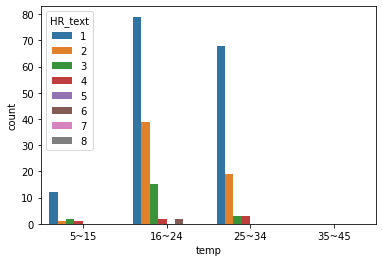

In [25]:
sns.countplot(data = lotte, x = 'temp', hue='HR_text')

In [26]:
test_result = samsung[['HR_text', 'team_text','temp', 'day_text']].groupby(['HR_text','temp', 'team_text']).count()
test_result

day_text
HR_text temp  team_text          
1       5~15  삼성 라이온즈         9.0
        16~24 삼성 라이온즈        69.0
        25~34 삼성 라이온즈        88.0
        35~45 삼성 라이온즈         1.0
2       5~15  삼성 라이온즈         1.0
        16~24 삼성 라이온즈        37.0
        25~34 삼성 라이온즈        40.0
        35~45 삼성 라이온즈         3.0
3       5~15  삼성 라이온즈         NaN
        16~24 삼성 라이온즈        11.0
        25~34 삼성 라이온즈         9.0
        35~45 삼성 라이온즈         NaN
4       5~15  삼성 라이온즈         NaN
        16~24 삼성 라이온즈         1.0
        25~34 삼성 라이온즈         4.0
        35~45 삼성 라이온즈         1.0
5       5~15  삼성 라이온즈         NaN
        16~24 삼성 라이온즈         1.0
        25~34 삼성 라이온즈         NaN
        35~45 삼성 라이온즈         NaN
6       5~15  삼성 라이온즈         NaN
        16~24 삼성 라이온즈         NaN
        25~34 삼성 라이온즈         NaN
        35~45 삼성 라이온즈         NaN
7       5~15  삼성 라이온즈         NaN
        16~24 삼성 라이온즈         NaN
        25~34 삼성 라이온즈         NaN
        35~45 삼성 라이온즈         NaN
8       5~15  삼성 라이온즈         NaN
        16~24 삼성 라이온즈         NaN
        25~34 삼성 라이온즈         NaN
        35~45 삼성 라이온즈         NaN

<AxesSubplot:xlabel='temp', ylabel='count'>

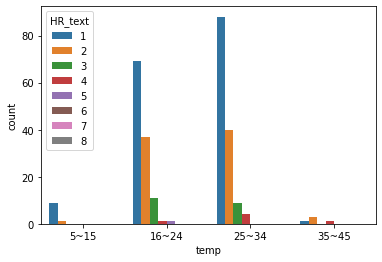

In [27]:
sns.countplot(data = samsung, x = 'temp', hue='HR_text')

In [28]:
test_result = sk[['HR_text', 'team_text','temp', 'day_text']].groupby(['HR_text','temp', 'team_text']).count()
test_result

day_text
HR_text temp  team_text          
1       5~15  SK 와이번스        23.0
        16~24 SK 와이번스        96.0
        25~34 SK 와이번스        89.0
        35~45 SK 와이번스         1.0
2       5~15  SK 와이번스        13.0
        16~24 SK 와이번스        47.0
        25~34 SK 와이번스        38.0
        35~45 SK 와이번스         NaN
3       5~15  SK 와이번스         2.0
        16~24 SK 와이번스        11.0
        25~34 SK 와이번스        12.0
        35~45 SK 와이번스         1.0
4       5~15  SK 와이번스         NaN
        16~24 SK 와이번스         4.0
        25~34 SK 와이번스         3.0
        35~45 SK 와이번스         NaN
5       5~15  SK 와이번스         3.0
        16~24 SK 와이번스         2.0
        25~34 SK 와이번스         1.0
        35~45 SK 와이번스         NaN
6       5~15  SK 와이번스         NaN
        16~24 SK 와이번스         NaN
        25~34 SK 와이번스         1.0
        35~45 SK 와이번스         NaN
7       5~15  SK 와이번스         NaN
        16~24 SK 와이번스         NaN
        25~34 SK 와이번스         NaN
        35~45 SK 와이번스         NaN
8       5~15  SK 와이번스         NaN
        16~24 SK 와이번스         NaN
        25~34 SK 와이번스         NaN
        35~45 SK 와이번스         NaN

<AxesSubplot:xlabel='temp', ylabel='count'>

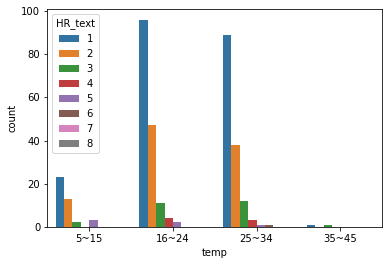

In [29]:
sns.countplot(data = sk, x = 'temp', hue='HR_text')

In [30]:
test_result = 한화[['HR_text', 'team_text','temp', 'day_text']].groupby(['HR_text','temp', 'team_text']).count()
test_result

day_text
HR_text temp  team_text          
1       5~15  한화 이글스         10.0
        16~24 한화 이글스         60.0
        25~34 한화 이글스         77.0
        35~45 한화 이글스          1.0
2       5~15  한화 이글스          2.0
        16~24 한화 이글스         17.0
        25~34 한화 이글스         26.0
        35~45 한화 이글스          NaN
3       5~15  한화 이글스          NaN
        16~24 한화 이글스          2.0
        25~34 한화 이글스          9.0
        35~45 한화 이글스          NaN
4       5~15  한화 이글스          NaN
        16~24 한화 이글스          2.0
        25~34 한화 이글스          3.0
        35~45 한화 이글스          NaN
5       5~15  한화 이글스          NaN
        16~24 한화 이글스          NaN
        25~34 한화 이글스          1.0
        35~45 한화 이글스          NaN
6       5~15  한화 이글스          NaN
        16~24 한화 이글스          NaN
        25~34 한화 이글스          NaN
        35~45 한화 이글스          NaN
7       5~15  한화 이글스          NaN
        16~24 한화 이글스          NaN
        25~34 한화 이글스          NaN
        35~45 한화 이글스          NaN
8       5~15  한화 이글스          NaN
        16~24 한화 이글스          NaN
        25~34 한화 이글스          NaN
        35~45 한화 이글스          NaN

<AxesSubplot:xlabel='temp', ylabel='count'>

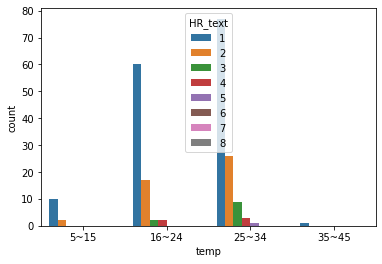

In [31]:
sns.countplot(data = 한화, x = 'temp', hue='HR_text')

In [ ]:
sns.countplot(data = nc, x = 'humidity', hue='HR_text')

In [ ]:
test_result = nc[['temp', 'team_text', 'result_text', 'day_text']].groupby(['temp', 'team_text','result_text']).count()
test_result

In [ ]:
test_result = ds[['temp', 'team_text', 'result_text', 'day_text']].groupby(['temp', 'team_text','result_text']).count()
test_result

In [ ]:
test_result = kt[['temp', 'team_text', 'result_text', 'location']].groupby(['temp', 'team_text','result_text']).count()
test_result

In [ ]:
test_result = lg[['temp', 'team_text', 'result_text', 'location']].groupby(['temp', 'team_text','result_text']).count()
test_result

In [ ]:
test_result = kia[['temp', 'team_text', 'result_text', 'location']].groupby(['temp', 'team_text','result_text']).count()
test_result

In [ ]:
test_result = lotte[['temp', 'team_text', 'result_text', 'location']].groupby(['temp', 'team_text','result_text']).count()
test_result

In [ ]:
test_result = samsung[['temp', 'team_text', 'result_text', 'location']].groupby(['temp', 'team_text','result_text']).count()
test_result

In [ ]:
test_result = sk[['temp', 'team_text', 'result_text', 'location']].groupby(['temp', 'team_text','result_text']).count()
test_result

In [ ]:
test_result = 한화[['temp', 'team_text', 'result_text', 'location']].groupby(['temp', 'team_text','result_text']).count()
test_result

In [ ]:
test_result = 키움[['temp', 'team_text', 'result_text', 'location']].groupby(['temp', 'team_text','result_text']).count()
test_result

In [ ]:
import seaborn as sns  # 시각화 라이브러리
sns.set(font="Hancom Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
sns.countplot(data = 키움, x = 'location', hue='result_text')

In [ ]:
sns.countplot(data = nc, x = 'location', hue='result_text')

In [ ]:
bins = [1,6,11,16,21,26,31]  # 구간 만들기
labels = ['1-5', '5-10', '10-15', '15-20', '20-25', '25-30']
nc['H_text'] = pd.cut(nc['H_text'], bins = bins, labels = labels)
ds['H_text'] = pd.cut(ds['H_text'], bins = bins, labels = labels)
kt['H_text'] = pd.cut(kt['H_text'], bins = bins, labels = labels)
lg['H_text'] = pd.cut(lg['H_text'], bins = bins, labels = labels)
kia['H_text'] = pd.cut(kia['H_text'], bins = bins, labels = labels)
lotte['H_text'] = pd.cut(lotte['H_text'], bins = bins, labels = labels)
samsung['H_text'] = pd.cut(samsung['H_text'], bins = bins, labels = labels)
sk['H_text'] = pd.cut(sk['H_text'], bins = bins, labels = labels)
한화['H_text'] = pd.cut(한화['H_text'], bins = bins, labels = labels)
키움['H_text'] = pd.cut(키움['H_text'], bins = bins, labels = labels)

In [ ]:
sns.countplot(data = nc, x = 'H_text', hue='result_text')

In [ ]:
sns.countplot(data = 한화, x = 'H_text', hue='result_text')

In [ ]:
sns.countplot(data = kia, x = 'H_text', hue='result_text')

In [ ]:
sns.countplot(data = kia, x = 'DU_text', hue='result_text')

In [ ]:
sns.countplot(data = ds, x = 'DU_text', hue='result_text')

In [ ]:
sns.countplot(data = ds, x = 'ER_text', hue='result_text')

In [ ]:
bins = [0,21,41,61,81,101]  # 구간 만들기
labels = ['0-20', '20-40', '40-60', '60-80', '80-100']
nc['humidity'] = pd.cut(nc['humidity'], bins = bins, labels = labels)
ds['humidity'] = pd.cut(ds['humidity'], bins = bins, labels = labels)
kt['humidity'] = pd.cut(kt['humidity'], bins = bins, labels = labels)
lg['humidity'] = pd.cut(lg['humidity'], bins = bins, labels = labels)
kia['humidity'] = pd.cut(kia['humidity'], bins = bins, labels = labels)
lotte['humidity'] = pd.cut(lotte['humidity'], bins = bins, labels = labels)
samsung['humidity'] = pd.cut(samsung['humidity'], bins = bins, labels = labels)
sk['humidity'] = pd.cut(sk['humidity'], bins = bins, labels = labels)
한화['humidity'] = pd.cut(한화['humidity'], bins = bins, labels = labels)
키움['humidity'] = pd.cut(키움['humidity'], bins = bins, labels = labels)

In [ ]:
sns.countplot(data = nc, x = 'humidity', hue='result_text')

In [ ]:
sns.countplot(data = ds, x = 'humidity', hue='result_text')

In [ ]:
sns.countplot(data = kt, x = 'humidity', hue='result_text')

In [ ]:
test_result = lotte[['humidity', 'team_text', 'result_text', 'location']].groupby(['humidity', 'team_text','result_text']).count()
test_result